In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint 

pd.set_option('display.max_columns', None)

In [2]:
full_data = pd.read_csv('IS453 Group Assignment - Data.csv')

#use a copy of hmeq_data for credit risk model
full_data = full_data.copy()

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   STATUS                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
full_data['OCCUPATION_TYPE'].value_counts()

In [ ]:
full_data['ORGANIZATION_TYPE'].value_counts()

In [3]:
# Extract the data required for our analysis which is: 
# ['OCCUPATION_TYPE'] = 'Drivers', 'Realty agents', maybe 'Sales staff'? 
# ['ORGANIZATION_TYPE'] = 'Self-employed', 'Realtor' 
#Renive

working_set = full_data[(full_data["OCCUPATION_TYPE"] == 'Drivers') | (full_data["OCCUPATION_TYPE"] == 'Realty agents') |  (full_data["OCCUPATION_TYPE"] == 'Sales staff') | (full_data["ORGANIZATION_TYPE"] == 'Self-employed') | (full_data["ORGANIZATION_TYPE"] == 'Realtor')  ]

working_set_orig = working_set.copy()

working_set.head()
working_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72518 entries, 13 to 307506
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       72518 non-null  int64  
 1   NAME_CONTRACT_TYPE           72518 non-null  object 
 2   CODE_GENDER                  72518 non-null  object 
 3   FLAG_OWN_CAR                 72518 non-null  object 
 4   FLAG_OWN_REALTY              72518 non-null  object 
 5   CNT_CHILDREN                 72518 non-null  int64  
 6   AMT_INCOME_TOTAL             72518 non-null  float64
 7   AMT_CREDIT                   72518 non-null  float64
 8   AMT_ANNUITY                  72513 non-null  float64
 9   AMT_GOODS_PRICE              72443 non-null  float64
 10  NAME_TYPE_SUITE              72213 non-null  object 
 11  NAME_INCOME_TYPE             72518 non-null  object 
 12  NAME_EDUCATION_TYPE          72518 non-null  object 
 13  NAME_FAMILY_ST

In [4]:
working_set.head(20)

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
20,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,7.0,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.565655,0.113375,NaN,0.0722,0.0,0.0,0.0,0.0,-296.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,37561.5,927000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-14815,-1652,-2299.0,-2299,14.0,1,1,0,1,0,0,Sales staff,3.0,2,2,MONDAY,9,0,0,0,0,0,0,Trade: type 7,0.437709,0.233767,0.542445,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
22,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,-11146,-4306,-114.0,-2518,NaN,1,1,0,1,0,0,Sales staff,3.0,3,2,THURSDAY,6,0,0,0,0,0,0,Self-employed,NaN,0.457143,0.358951,0.0907,0.0,0.0,0.0,0.0,-468.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
35,0,Cash loans,F,N,N,0,112500.0,450000.0,44509.5,450000.0,Unaccompanied,Working,Higher

In [5]:
working_set.describe(include = 'all')

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,72518.000000,72518,72518,72518,72518,72518.000000,7.251800e+04,7.251800e+04,72513.000000,7.244300e+04,72213,72518,72518,72518,72518,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,30032.000000,72518.0,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,68928,72518.000000,72518.000000,72518.000000,72518,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518,34004.000000,72350.000000,55540.000000,33101.000000,72307.000000,72307.000000,72307.000000,72307.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.0,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,72518.000000,61021.000000,61021.000000,61021.000000,61021.000000,61021.000000,61021.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,7,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales staff,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Self-employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,65286,43270,42484,49300,NaN,NaN,NaN,NaN,NaN,58733,48385,56280,47062,63284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32102,NaN,NaN,NaN,12860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.101409,NaN,NaN,NaN,NaN,0.507819,1.692744e+05,5.892629e+05,27666.778950,5.282580e+05,NaN,NaN,NaN,NaN,NaN,0.019997,-14448.679031,-1860.403914,-4521.843405,-2736.419275,12.261621,1.0,0.999931,0.244588,0.998359,0.257150,0.057903,NaN,2.273311,2.076988,2.057793,NaN,12.078753,0.016189,0.047533,0.035191,0.102457,0.278965,0.205108,NaN,0.453021,0.503878,0.499952,0.113259,1.479331,0.144675,1.461560,0.101069,-946.404300,0.000041,0.745318,0.000083,0.015582,0.005447,0.000207,0.120260,0.004661,0.000041,0.004702,0.0,0.004068,0.002717,0.001324,0.012659,0.000124,0.005488,0.000703,0.000552,0.000359,0.006309,0.006932,0.034529,0.244145,0.273545,1.955114
std,0.301872,NaN,NaN,NaN,NaN,0.757321,9.007452e+04,3.816582e+05,14131.443525,3.487355e+05,

# 1. Data Preparation 


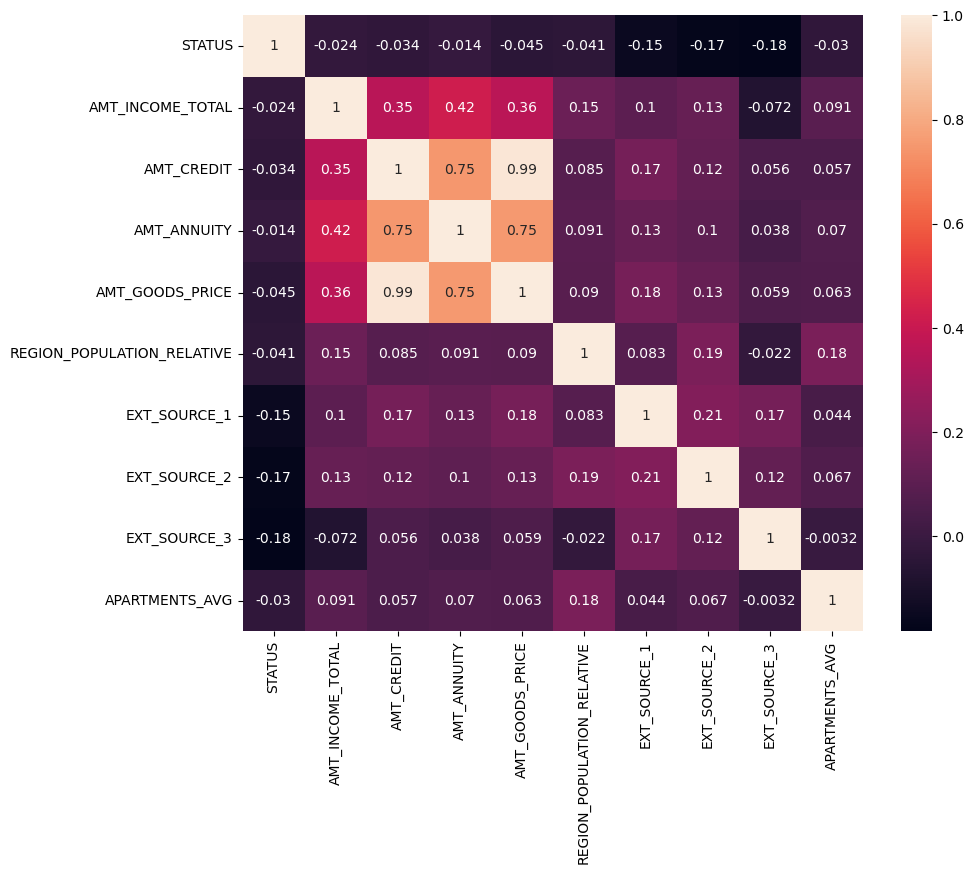

In [6]:
#Determine which variables are continuous variables 
cont_variables = working_set[["STATUS", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG"]]

#Check for highly correlated variables for CONTINUOUS VARIABLES ONLY 
cor = cont_variables.corr() 
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, ax=ax)
plt.show()


In [7]:
#Dropping Variables that result in biasedness and highly correlated ones
working_set = working_set.drop(columns=['CODE_GENDER', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1)

working_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72518 entries, 13 to 307506
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       72518 non-null  int64  
 1   NAME_CONTRACT_TYPE           72518 non-null  object 
 2   FLAG_OWN_CAR                 72518 non-null  object 
 3   FLAG_OWN_REALTY              72518 non-null  object 
 4   CNT_CHILDREN                 72518 non-null  int64  
 5   AMT_INCOME_TOTAL             72518 non-null  float64
 6   AMT_CREDIT                   72518 non-null  float64
 7   NAME_TYPE_SUITE              72213 non-null  object 
 8   NAME_INCOME_TYPE             72518 non-null  object 
 9   NAME_EDUCATION_TYPE          72518 non-null  object 
 10  NAME_FAMILY_STATUS           72518 non-null  object 
 11  NAME_HOUSING_TYPE            72518 non-null  object 
 12  REGION_POPULATION_RELATIVE   72518 non-null  float64
 13  DAYS_BIRTH    

In [8]:
# Inspect rows missing more than 4 values &  make sure not to reduce sample size too much 
rows_w_gt_3_na = working_set[working_set.isnull().sum(axis=1) > 3].shape[0]
print('Percent of total rows missing more than 3 values: ' + str("{:.1%}".format(rows_w_gt_3_na/working_set.shape[0])))
print(rows_w_gt_3_na)

Percent of total rows missing more than 3 values: 18.4%
13335


In [9]:
working_set.dropna(thresh=working_set.shape[1]-3,inplace=True)
print("Starting row count: " + str(working_set_orig.shape[0]))
print("Ending row count: " + str(working_set.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-working_set.shape[0]/working_set_orig.shape[0]))

Starting row count: 72518
Ending row count: 59183
Percent dropped: 18.39%


In [10]:
#Check % of missing column values again with revised dataset 
col_w_na = pd.DataFrame((working_set.isnull().sum().sort_values(ascending=False)/working_set.shape[0])).applymap("{0:.0%}".format)

col_w_na.head(10)

,0
OWN_CAR_AGE,56%
APARTMENTS_AVG,53%
EXT_SOURCE_1,51%
EXT_SOURCE_3,7%
OCCUPATION_TYPE,4%
NAME_TYPE_SUITE,0%
EXT_SOURCE_2,0%
OBS_60_CNT_SOCIAL_CIRCLE,0%
DEF_60_CNT_SOCIAL_CIRCLE,0%
DAYS_LAST_PHONE_CHANGE,0%


In [11]:
working_set.tail(10)

,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307473,0,Cash loans,Y,Y,1,90000.0,258709.5,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.020246,-14589,-2145,-2337.0,-6211,18.0,1,1,1,1,1,0,High skill tech staff,3.0,3,3,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.585450,0.264486,0.565608,NaN,1.0,0.0,1.0,0.0,-637.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
307478,0,Cash loans,N,Y,0,225000.0,1125000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.025164,-19471,-1864,-322.0,-2754,NaN,1,1,0,1,0,0,Core staff,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,Self-employed,0.889817,0.440537,0.420611,0.0371,0.0,0.0,0.0,0.0,-549.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
307479,0,Cash loans,N,Y,1,112500.0,521280.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.006207,-13346,-1972,-11.0,-1537,NaN,1,1,1,1,1,0,Sales staff,3.0,2,2,SUNDAY,10,0,0,0,0,1,1,Self-employed,0.407174,0.226036,0.352340,NaN,3.0,0.0,3.0,0.0,-396.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307485,0,Revolving loans,N,Y,1,270000.0,180000.0,Family,Working,Secondary / secondary special,Separated,With parents,0.003813,-11973,-670,-1926.0,-626,NaN,1,1,1,1,0,0,Sales staff,2.0,2,2,SATURDAY,18,1,1,0,1,1,0,Business Entity Type 3,0.426391,0.702403,0.865896,NaN,0.0,0.0,0.0,0.0,-336.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307489,1,Cash loans,N,Y,0,225000.0,521280.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,FRIDAY,5,0,0,0,0,0,0,Business Entity Type 3,NaN,0.615261,0.397946,0.0113,1.0,1.0,1.0,0.0,-307.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
307491,0,Cash loans,Y,Y,2,90000.0,1078200.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.019101,-10976,-1953,-5048.0,-3369,15.0,1,1,1,1,0,0,Drivers,4.0,2,2,SATURDAY,10,0,0,0,0,0,0,Self-employed,0.532858,0.561158,0.716570,NaN,4.0,0.0,4.0,0.0,-1357.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,7.0
307492,0,Cash loans,Y,Y,0,585000.0,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-20965,-1618,-1764.0,-4410,2.0,1,1,0,1,0,0,Sales staff,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Self-employed,NaN,0.599173,0.365617,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307494,0,Cash loans,Y,N,1,270000.0,479700.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-14958,-6573,-1438.0,-4519,15.0,1,1,0,1,0,0,D

In [14]:
#Remove 3 variables as the amount of missing data is more than 50% 
working_set = working_set.drop(columns=['OWN_CAR_AGE', 'APARTMENTS_AVG', 'EXT_SOURCE_1', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], axis=1)

working_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59183 entries, 13 to 307497
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STATUS                       59183 non-null  int64  
 1   NAME_CONTRACT_TYPE           59183 non-null  object 
 2   FLAG_OWN_CAR                 59183 non-null  object 
 3   FLAG_OWN_REALTY              59183 non-null  object 
 4   CNT_CHILDREN                 59183 non-null  int64  
 5   AMT_INCOME_TOTAL             59183 non-null  float64
 6   AMT_CREDIT                   59183 non-null  float64
 7   NAME_TYPE_SUITE              58965 non-null  object 
 8   NAME_INCOME_TYPE             59183 non-null  object 
 9   NAME_EDUCATION_TYPE          59183 non-null  object 
 10  NAME_FAMILY_STATUS           59183 non-null  object 
 11  NAME_HOUSING_TYPE            59183 non-null  object 
 12  REGION_POPULATION_RELATIVE   59183 non-null  float64
 13  DAYS_BIRTH    

In [ ]:
#Change all null values to 'Missing' /
#working_set = working_set.fillna('Missing')
#Check % of missing column values again with revised dataset 
#col_w_na = pd.DataFrame((working_set.isnull().sum().sort_values(ascending=False)/working_set.shape[0])).applymap("{0:.0%}".format)

#col_w_na.head(10)

In [18]:
#Generate WOE Bins 

#Remove missing values 
working_set.dropna(inplace=True)
working_set.isna().sum()
# automatically calculate bin ranges 
bins = sc.woebin(working_set, y='STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
Binning on 54586 rows and 64 columns in 00:00:49
FLAG_DOCUMENT_20  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_20,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_HOUR,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.02)",31921,0.584784,28626,3295,0.103224,0.050181,0.001503,0.025719,0.02,False
1,REGION_POPULATION_RELATIVE,"[0.02,0.03)",10919,0.200033,9749,1170,0.107153,0.091930,0.001754,0.025719,0.03,False
2,REGION_POPULATION_RELATIVE,"[0.03,0.04)",8843,0.162001,8072,771,0.087188,-0.136378,0.002852,0.025719,0.04,False
3,REGION_POPULATION_RELATIVE,"[0.04,inf)",2903,0.053182,2753,150,0.051671,-0.697721,0.019610,0.025719,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_14  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_14,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_FAM_MEMBERS,"[-inf,2.0)",9555,0.175045,8535,1020,0.106750,0.087718,0.001395,0.002182,2.0,False
1,CNT_FAM_MEMBERS,"[2.0,3.0)",26823,0.491390,24265,2558,0.095366,-0.037719,0.000689,0.002182,3.0,False
2,CNT_FAM_MEMBERS,"[3.0,4.0)",11845,0.216997,10681,1164,0.098269,-0.004513,0.000004,0.002182,4.0,False
3,CNT_FAM_MEMBERS,"[4.0,inf)",6363,0.116568,5719,644,0.101210,0.028240,0.000094,0.002182,inf,False


----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_WORK_PHONE,"[-inf,1.0)",41215,0.755047,37250,3965,0.096203,-0.028055,0.000588,0.00232,1.0,False
1,FLAG_WORK_PHONE,"[1.0,inf)",13371,0.244953,11950,1421,0.106275,0.082720,0.001733,0.00232,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT_W_CITY,"[-inf,2.0)",4609,0.084436,4340,269,0.058364,-0.568828,0.021767,0.046456,2.0,False
1,REGION_RATING_CLIENT_W_CITY,"[2.0,3.0)",42268,0.774338,38216,4052,0.095864,-0.031953,0.000781,0.046456,3.0,False
2,REGION_RATING_CLIENT_W_CITY,"[3.0,inf)",7709,0.141227,6644,1065,0.138150,0.381351,0.023909,0.046456,inf,False


----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",48151,0.882113,43566,4585,0.095221,-0.039396,0.001348,0.010288,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",6435,0.117887,5634,801,0.124476,0.261377,0.008941,0.010288,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,17625,0.322885,15903,1722,0.097702,-0.010931,0.000038,0.000057,N,False
1,FLAG_OWN_REALTY,Y,36961,0.677115,33297,3664,0.099132,0.005179,0.000018,0.000057,Y,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,Y,23667,0.433573,21544,2123,0.089703,-0.105177,0.004598,0.007872,Y,False
1,FLAG_OWN_CAR,N,30919,0.566427,27656,3263,0.105534,0.074895,0.003274,0.007872,N,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,100000.0)",8759,0.160462,7892,867,0.098984,0.003525,0.000002,0.009423,100000.0,False
1,AMT_INCOME_TOTAL,"[100000.0,200000.0)",29035,0.531913,25976,3059,0.105356,0.073006,0.002919,0.009423,200000.0,False
2,AMT_INCOME_TOTAL,"[200000.0,270000.0)",9842,0.180303,8951,891,0.090530,-0.095085,0.001569,0.009423,270000.0,False
3,AMT_INCOME_TOTAL,"[270000.0,inf)",6950,0.127322,6381,569,0.081871,-0.205109,0.004933,0.009423,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_10  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_10,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUR_APPR_PROCESS_START,"[-inf,9.0)",6298,0.115378,5524,774,0.122896,0.246805,0.007757,0.013212,9.0,False
1,HOUR_APPR_PROCESS_START,"[9.0,15.0)",34694,0.635584,31263,3431,0.098893,0.002507,0.000004,0.013212,15.0,False
2,HOUR_APPR_PROCESS_START,"[15.0,17.0)",8255,0.151229,7507,748,0.090612,-0.094098,0.001289,0.013212,17.0,False
3,HOUR_APPR_PROCESS_START,"[17.0,inf)",5339,0.097809,4906,433,0.081101,-0.215386,0.004162,0.013212,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_18  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_18,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_16  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_16,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_REGISTRATION,"[-inf,-9500.0)",4143,0.075899,3856,287,0.069273,-0.385813,0.009679,0.023483,-9500.0,False
1,DAYS_REGISTRATION,"[-9500.0,-6000.0)",12875,0.235866,11759,1116,0.086680,-0.142777,0.004540,0.023483,-6000.0,False
2,DAYS_REGISTRATION,"[-6000.0,-2000.0)",22950,0.420437,20590,2360,0.102832,0.045947,0.000904,0.023483,-2000.0,False
3,DAYS_REGISTRATION,"[-2000.0,-1500.0)",2846,0.052138,2591,255,0.089599,-0.106445,0.000566,0.023483,-1500.0,False
4,DAYS_REGISTRATION,"[-1500.0,inf)",11772,0.215660,10404,1368,0.116208,0.183250,0.007793,0.023483,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_19  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_19,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_WORK_REGION,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_PHONE,"[-inf,1.0)",40011,0.73299,35878,4133,0.103297,0.050970,0.001944,0.007732,1.0,False
1,FLAG_PHONE,"[1.0,inf)",14575,0.26701,13322,1253,0.085969,-0.151785,0.005788,0.007732,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_6  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_6,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMAIL,"[-inf,1.0)",51285,0.939527,46224,5061,0.098684,0.000156,2.274209e-08,3.764332e-07,1.0,False
1,FLAG_EMAIL,"[1.0,inf)",3301,0.060473,2976,325,0.098455,-0.002420,3.536911e-07,3.764332e-07,inf,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_LIVE_REGION,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_QRT,"[-inf,1.0)",43864,0.803576,39418,4446,0.101359,0.029873,0.000726,0.005722,1.0,False
1,AMT_REQ_CREDIT_BUREAU_QRT,"[1.0,2.0)",7169,0.131334,6581,588,0.082020,-0.203124,0.004994,0.005722,2.0,False
2,AMT_REQ_CREDIT_BUREAU_QRT,"[2.0,inf)",3553,0.065090,3201,352,0.099071,0.004503,0.000001,0.005722,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",9851,0.180468,9127,724,0.073495,-0.322110,0.016455,0.019563,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Incomplete higher%,%Secondary / secondary spec...",44735,0.819532,40073,4662,0.104214,0.060832,0.003108,0.019563,"Incomplete higher%,%Secondary / secondary spec...",False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4100.0)",14900,0.272964,13708,1192,0.080000,-0.230256,0.013194,0.022335,-4100.0,False
1,DAYS_ID_PUBLISH,"[-4100.0,-2900.0)",12176,0.223061,11007,1169,0.096009,-0.030292,0.000202,0.022335,-2900.0,False
2,DAYS_ID_PUBLISH,"[-2900.0,-1900.0)",10421,0.190910,9337,1084,0.104021,0.058764,0.000675,0.022335,-1900.0,False
3,DAYS_ID_PUBLISH,"[-1900.0,inf)",17089,0.313066,15148,1941,0.113582,0.157425,0.008264,0.022335,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_13  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_13,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",49871,0.913623,45086,4785,0.095948,-0.030995,0.000867,0.008937,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",4715,0.086377,4114,601,0.127466,0.288534,0.008070,0.008937,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.2)",4988,0.091379,3848,1140,0.228549,0.995565,0.132857,0.270293,0.2,False
1,EXT_SOURCE_2,"[0.2,0.4)",9257,0.169586,7992,1265,0.136653,0.368722,0.026706,0.270293,0.4,False
2,EXT_SOURCE_2,"[0.4,0.6000000000000001)",18358,0.336313,16688,1670,0.090969,-0.089776,0.002615,0.270293,0.6000000000000001,False
3,EXT_SOURCE_2,"[0.6000000000000001,0.7000000000000001)",14807,0.271260,13820,987,0.066658,-0.427111,0.041704,0.270293,0.7000000000000001,False
4,EXT_SOURCE_2,"[0.7000000000000001,inf)",7176,0.131462,6852,324,0.045151,-0.839462,0.066412,0.270293,inf,False


----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WEEKDAY_APPR_PROCESS_START,"MONDAY%,%SUNDAY",11943,0.218792,10838,1105,0.092523,-0.071123,0.001076,0.002897,"MONDAY%,%SUNDAY",False
1,WEEKDAY_APPR_PROCESS_START,"THURSDAY%,%SATURDAY%,%WEDNESDAY",24340,0.445902,21961,2379,0.097740,-0.010497,0.000049,0.002897,"THURSDAY%,%SATURDAY%,%WEDNESDAY",False
2,WEEKDAY_APPR_PROCESS_START,TUESDAY,9484,0.173744,8535,949,0.100063,0.015569,0.000042,0.002897,TUESDAY,False
3,WEEKDAY_APPR_PROCESS_START,FRIDAY,8819,0.161562,7866,953,0.108062,0.101401,0.001730,0.002897,FRIDAY,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_LIVE_CITY,"[-inf,1.0)",49243,0.902118,44581,4662,0.094673,-0.045773,0.001856,0.016408,1.0,False
1,REG_CITY_NOT_LIVE_CITY,"[1.0,inf)",5343,0.097882,4619,724,0.135504,0.358949,0.014552,0.016408,inf,False


----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_CONT_MOBILE,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,2.0)",37011,0.678031,33389,3622,0.097863,-0.009110,0.000056,0.001351,2.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,3.0)",5460,0.100026,4941,519,0.095055,-0.041329,0.000168,0.001351,3.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[3.0,4.0)",3803,0.069670,3403,400,0.105180,0.071143,0.000363,0.001351,4.0,False
3,OBS_30_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",4471,0.081907,4040,431,0.096399,-0.025801,0.000054,0.001351,6.0,False
4,OBS_30_CNT_SOCIAL_CIRCLE,"[6.0,inf)",3841,0.070366,3427,414,0.107784,0.098516,0.000710,0.001351,inf,False


----------------------------------------------------------------------------------------------------
LIVE_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_REGION_NOT_WORK_REGION,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_9  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_9,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_3,"[-inf,0.2)",4811,0.088136,3663,1148,0.238620,1.051829,0.145882,0.327634,0.2,False
1,EXT_SOURCE_3,"[0.2,0.4)",12413,0.227403,10688,1725,0.138967,0.388196,0.039999,0.327634,0.4,False
2,EXT_SOURCE_3,"[0.4,0.5)",8212,0.150442,7427,785,0.095592,-0.035103,0.000183,0.327634,0.5,False
3,EXT_SOURCE_3,"[0.5,0.6000000000000001)",9446,0.173048,8763,683,0.072306,-0.339708,0.017427,0.327634,0.6000000000000001,False
4,EXT_SOURCE_3,"[0.6000000000000001,inf)",19704,0.360972,18659,1045,0.053035,-0.670221,0.124143,0.327634,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_7  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_7,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,250000.0)",9756,0.178727,8910,846,0.086716,-0.142320,0.003419,0.048854,250000.0,False
1,AMT_CREDIT,"[250000.0,350000.0)",8298,0.152017,7431,867,0.104483,0.063714,0.000633,0.048854,350000.0,False
2,AMT_CREDIT,"[350000.0,650000.0)",15912,0.291503,13943,1969,0.123743,0.254639,0.020927,0.048854,650000.0,False
3,AMT_CREDIT,"[650000.0,850000.0)",8262,0.151357,7494,768,0.092956,-0.065978,0.000642,0.048854,850000.0,False
4,AMT_CREDIT,"[850000.0,1300000.0)",9420,0.172572,8645,775,0.082272,-0.199783,0.006357,0.048854,1300000.0,False
5,AMT_CREDIT,"[1300000.0,inf)",2938,0.053823,2777,161,0.054799,-0.635631,0.016877,0.048854,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_17  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_17,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-18000.0)",10151,0.185963,9394,757,0.074574,-0.306373,0.015437,0.041216,-18000.0,False
1,DAYS_BIRTH,"[-18000.0,-15500.0)",11159,0.204430,10192,967,0.086657,-0.143069,0.003951,0.041216,-15500.0,False
2,DAYS_BIRTH,"[-15500.0,-14000.0)",8119,0.148738,7358,761,0.093731,-0.056819,0.000469,0.041216,-14000.0,False
3,DAYS_BIRTH,"[-14000.0,-11000.0)",15224,0.278899,13611,1613,0.105951,0.079308,0.001811,0.041216,-11000.0,False
4,DAYS_BIRTH,"[-11000.0,inf)",9933,0.181970,8645,1288,0.129669,0.308200,0.019548,0.041216,inf,False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,5132,0.094017,4768,364,0.070928,-0.360438,0.010571,0.011508,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,49454,0.905983,44432,5022,0.101549,0.031959,0.000937,0.011508,Cash loans,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_3,"[-inf,1.0)",13657,0.250192,12554,1103,0.080764,-0.219915,0.011078,0.014374,1.0,False
1,FLAG_DOCUMENT_3,"[1.0,inf)",40929,0.749808,36646,4283,0.104645,0.065440,0.003296,0.014374,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_MON,"[-inf,1.0)",45686,0.836955,41137,4549,0.099571,0.010090,0.000086,0.000536,1.0,False
1,AMT_REQ_CREDIT_BUREAU_MON,"[1.0,inf)",8900,0.163045,8063,837,0.094045,-0.053126,0.000450,0.000536,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_8  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_8,"[-inf,1.0)",47965,0.878705,43187,4778,0.099614,0.010573,0.000099,0.00084,1.0,False
1,FLAG_DOCUMENT_8,"[1.0,inf)",6621,0.121295,6013,608,0.091829,-0.079414,0.000741,0.00084,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"Widow%,%Married",37259,0.682574,33792,3467,0.093051,-0.064844,0.002796,0.008676,"Widow%,%Married",False
1,NAME_FAMILY_STATUS,"Separated%,%Civil marriage",9428,0.172718,8410,1018,0.107976,0.100509,0.001817,0.008676,"Separated%,%Civil marriage",False
2,NAME_FAMILY_STATUS,Single / not married,7899,0.144707,6998,901,0.114065,0.162216,0.004063,0.008676,Single / not married,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",34079,0.624318,30766,3313,0.097215,-0.016465,0.000168,0.000444,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",13663,0.250302,12280,1383,0.101222,0.028374,0.000204,0.000444,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",6844,0.125380,6154,690,0.100818,0.023925,0.000072,0.000444,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_YEAR,"[-inf,1.0)",13555,0.248324,12247,1308,0.096496,-0.024691,0.000150,0.00398,1.0,False
1,AMT_REQ_CREDIT_BUREAU_YEAR,"[1.0,2.0)",13307,0.243780,12080,1227,0.092207,-0.074888,0.001327,0.00398,2.0,False
2,AMT_REQ_CREDIT_BUREAU_YEAR,"[2.0,4.0)",17828,0.326604,16059,1769,0.099226,0.006236,0.000013,0.00398,4.0,False
3,AMT_REQ_CREDIT_BUREAU_YEAR,"[4.0,inf)",9896,0.181292,8814,1082,0.109337,0.114560,0.002491,0.00398,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_21  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_21,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",4349,0.079672,4098,251,0.057714,-0.580711,0.021306,0.045562,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",41801,0.765782,37811,3990,0.095452,-0.036718,0.001017,0.045562,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",8436,0.154545,7291,1145,0.135728,0.360855,0.023238,0.045562,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_11  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_11,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_60_CNT_SOCIAL_CIRCLE,"[-inf,2.0)",37160,0.680761,33526,3634,0.097793,-0.009897,6.641199e-05,0.000981,2.0,False
1,OBS_60_CNT_SOCIAL_CIRCLE,"[2.0,3.0)",5445,0.099751,4925,520,0.095500,-0.036160,1.285501e-04,0.000981,3.0,False
2,OBS_60_CNT_SOCIAL_CIRCLE,"[3.0,4.0)",3790,0.069432,3395,395,0.104222,0.060917,2.640292e-04,0.000981,4.0,False
3,OBS_60_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",4427,0.081101,3991,436,0.098487,-0.002064,3.452914e-07,0.000981,6.0,False
4,OBS_60_CNT_SOCIAL_CIRCLE,"[6.0,inf)",3764,0.068955,3363,401,0.106536,0.085463,5.212089e-04,0.000981,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_15  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_15,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"Co-op apartment%,%Office apartment%,%House / a...",50090,0.917635,45294,4796,0.095748,-0.033302,0.001004,0.010712,"Co-op apartment%,%Office apartment%,%House / a...",False
1,NAME_HOUSING_TYPE,"With parents%,%Rented apartment",4496,0.082365,3906,590,0.131228,0.321944,0.009708,0.010712,"With parents%,%Rented apartment",False


----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMP_PHONE,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_TYPE_SUITE,"Group of people%,%Family",6985,0.127963,6347,638,0.091339,-0.085309,0.000900,0.001036,"Group of people%,%Family",False
1,NAME_TYPE_SUITE,"Other_A%,%Unaccompanied",44697,0.818836,40242,4455,0.099671,0.011206,0.000103,0.001036,"Other_A%,%Unaccompanied",False
2,NAME_TYPE_SUITE,"Spouse, partner%,%Children%,%Other_B",2904,0.053200,2611,293,0.100895,0.024775,0.000033,0.001036,"Spouse, partner%,%Children%,%Other_B",False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Businessman%,%Pensioner%,%Student%,%Commercial...",18237,0.334097,16692,1545,0.084718,-0.167815,0.008796,0.012797,"Businessman%,%Pensioner%,%Student%,%Commercial...",False
1,NAME_INCOME_TYPE,Working,36349,0.665903,32508,3841,0.105670,0.076337,0.004001,0.012797,Working,False


----------------------------------------------------------------------------------------------------
LIVE_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,LIVE_CITY_NOT_WORK_CITY,"[-inf,1.0)",43550,0.797824,39326,4224,0.096992,-0.019013,0.000286,0.001375,1.0,False
1,LIVE_CITY_NOT_WORK_CITY,"[1.0,inf)",11036,0.202176,9874,1162,0.105292,0.072328,0.001089,0.001375,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_WEEK,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4200.0)",4901,0.089785,4610,291,0.059376,-0.550569,0.021841,0.054805,-4200.0,False
1,DAYS_EMPLOYED,"[-4200.0,-2000.0)",14943,0.273752,13782,1161,0.077695,-0.261991,0.016915,0.054805,-2000.0,False
2,DAYS_EMPLOYED,"[-2000.0,inf)",34742,0.636464,30808,3934,0.113235,0.153973,0.016049,0.054805,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_4  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_4,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_WORK_CITY,"[-inf,1.0)",39710,0.727476,36023,3687,0.092848,-0.067254,0.003203,0.010997,1.0,False
1,REG_CITY_NOT_WORK_CITY,"[1.0,inf)",14876,0.272524,13177,1699,0.114211,0.163658,0.007794,0.010997,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_DAY,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2000.0)",6823,0.124995,6370,453,0.066393,-0.431372,0.019569,0.038849,-2000.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2000.0,-1200.0)",13207,0.241948,12097,1110,0.084046,-0.176507,0.007022,0.038849,-1200.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1200.0,-900.0)",5002,0.091635,4502,500,0.099960,0.014422,0.000019,0.038849,-900.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-900.0,inf)",29554,0.541421,26231,3323,0.112438,0.146017,0.012239,0.038849,inf,False


----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_5  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_DOCUMENT_5,"[-inf,inf)",54586,1.0,49200,5386,0.09867,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------


In [19]:
#IV Values Categorisation 
#IV < 0.02 : Not useful for prediction 

iv_zero = ['FLAG_DOCUMENT_20', 'AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_DOCUMENT_14','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_6', 'REG_REGION_NOT_LIVE_REGION', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_DOCUMENT_13', 'FLAG_CONT_MOBILE', 'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_15', 'FLAG_EMP_PHONE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_4',  'AMT_REQ_CREDIT_BUREAU_DAY', '']
not_useful = ['CNT_FAM_MEMBERS', 'FLAG_WORK_PHONE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_EDUCATION_TYPE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_DOCUMENT_8', 'NAME_FAMILY_STATUS',  'CNT_CHILDREN',  'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', '' ]
# 0.02 <= IV < 0.1 : Weak Predictive Power
weak = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE' ] 
# 0.1 <= IV < 0.5 : Medium Predictive Power 
medium = ['EXT_SOURCE_2'] 
# 0.3 <= IV < 0.5 : Strong predictive Power 
strong = ['EXT_SOURCE_3'] 

In [26]:
#Narrow down the columns 

scorecard_data = working_set[['STATUS', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']]

scorecard_data.head(10)
scorecard_data['STATUS'].value_counts()


0    49200
1     5386
Name: STATUS, dtype: int64

In [27]:
#Train-test split 
train, test = sc.split_df(scorecard_data, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(38210, 12)
(16376, 12)


In [28]:
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,REGION_RATING_CLIENT_W_CITY_woe,DAYS_BIRTH_woe,REGION_POPULATION_RELATIVE_woe,REGION_RATING_CLIENT_woe,NAME_EDUCATION_TYPE_woe,DAYS_EMPLOYED_woe,EXT_SOURCE_3_woe,DAYS_REGISTRATION_woe,DAYS_LAST_PHONE_CHANGE_woe,EXT_SOURCE_2_woe,AMT_CREDIT_woe
21,0,-0.031953,-0.056819,0.091930,-0.036718,0.060832,0.153973,-0.339708,0.045947,0.146017,0.368722,-0.199783
24,0,-0.031953,0.079308,0.091930,-0.036718,0.060832,0.153973,-0.339708,0.183250,0.146017,-0.839462,-0.142320
35,0,-0.031953,0.079308,0.050181,-0.036718,-0.322110,0.153973,-0.670221,-0.142777,-0.176507,-0.427111,0.254639
37,0,-0.031953,-0.306373,-0.136378,-0.036718,0.060832,0.153973,-0.670221,0.045947,-0.176507,-0.839462,0.254639
42,1,0.381351,0.079308,0.050181,0.360855,0.060832,-0.261991,0.388196,0.183250,-0.176507,-0.427111,0.063714
...,...,...,...,...,...,...,...,...,...,...,...,...
307478,0,-0.031953,-0.306373,0.091930,-0.036718,-0.322110,0.153973,-0.035103,0.183250,0.146017,-0.089776,-0.199783
307479,0,-0.031953,0.079308,0.050181,-0.036718,0.060832,0.153973,0.388196,0.183250,0.146017,0.368722,0.254639
307492,0,-0.031953,-0.306373,0.091930,-0.036718,0.060832,0.153973,0.388196,-0.106445,0.146017,-0.089776,-0.635631
307494,0,-0.031953,-0.056819,-0.136378,-0.036718,0.060832,-0.550569,-0.339708,0.183250,0.146017,-0.427111,0.254639


In [31]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("beta coefficients:")
print(lr.coef_)
print("alpha")
print(lr.intercept_)

beta coefficients:
[[0.45803333 0.07039504 0.05458335 0.07185404 0.88409194 0.49369962
  0.8918121  0.39020113 0.18525437 0.78031757 0.67014197]]
alpha
[-2.21331767]


In [32]:
# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
83  AMT_CREDIT       [-inf,250000.0)    55.0
84  AMT_CREDIT   [250000.0,350000.0)    51.0
85  AMT_CREDIT   [350000.0,650000.0)    48.0
86  AMT_CREDIT   [650000.0,850000.0)    54.0
87  AMT_CREDIT  [850000.0,1300000.0)    56.0
88  AMT_CREDIT       [1300000.0,inf)    65.0,
 'DAYS_BIRTH':       variable                  bin  points
90  DAYS_BIRTH      [-inf,-18000.0)    53.0
91  DAYS_BIRTH  [-18000.0,-15500.0)    53.0
92  DAYS_BIRTH  [-15500.0,-14000.0)    53.0
93  DAYS_BIRTH  [-14000.0,-11000.0)    52.0
94  DAYS_BIRTH       [-11000.0,inf)    52.0,
 'DAYS_EMPLOYED':           variable                bin  points
135  DAYS_EMPLOYED     [-inf,-4200.0)    60.0
136  DAYS_EMPLOYED  [-4200.0,-2000.0)    56.0
137  DAYS_EMPLOYED      [-2000.0,inf)    50.0,
 'DAYS_LAST_PHONE_CHANGE':                    variable                bin  points
142  DAYS_LAST_PHONE_CHANGE     [-inf,-2000.0)    55.0
143  DAYS_LAST_PHONE_CHANGE  [-2000.0,-1200.0)   

Text(0.5, 1.0, 'test data scores')

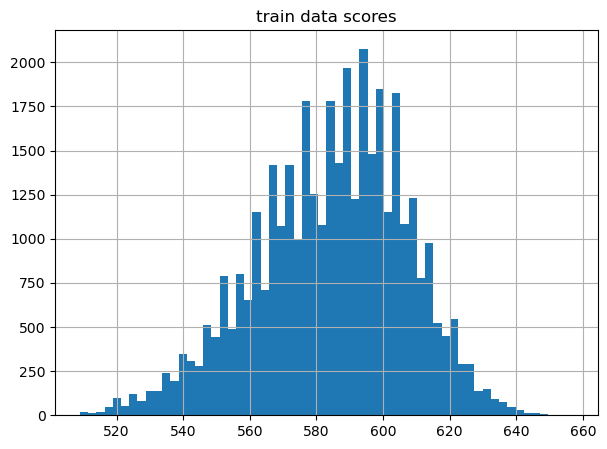

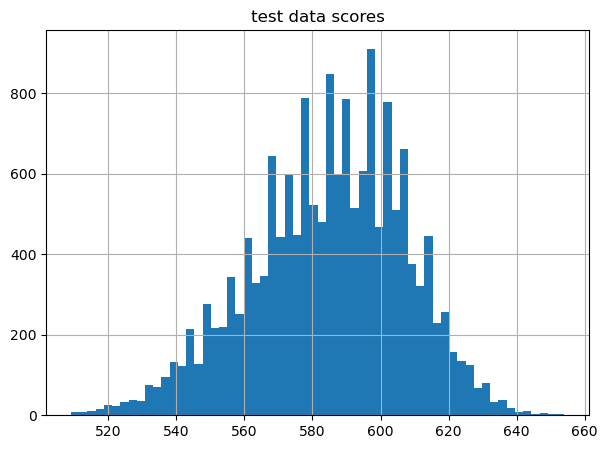

In [33]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

In [34]:
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))


Confusion matrix:
[[14757  1609]
 [    3     7]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     16366
           1       0.00      0.70      0.01        10

    accuracy                           0.90     16376
   macro avg       0.50      0.80      0.48     16376
weighted avg       1.00      0.90      0.95     16376



In [40]:
# calulate credit score for new application
col = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY','DAYS_REGISTRATION', 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']
val = [[0.079059696,0.61602712,0.015221,2,-6193, 'Secondary / secondary special', 284400, -13715,2,-151, -1364]]
new_appl = pd.DataFrame(val, columns=col)

new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
new_appl_score.index = new_appl_score.index.str.replace('_points', '')

summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
summary.columns = ['App Value','Points']
print(summary)


                                                 App Value  Points
EXT_SOURCE_3                                       0.07906    25.0
EXT_SOURCE_2                                      0.616027    62.0
REGION_POPULATION_RELATIVE                        0.015221    52.0
REGION_RATING_CLIENT_W_CITY                              2    53.0
DAYS_REGISTRATION                                    -6193    54.0
NAME_EDUCATION_TYPE          Secondary / secondary special    51.0
AMT_CREDIT                                          284400    51.0
DAYS_BIRTH                                          -13715    52.0
REGION_RATING_CLIENT                                     2    53.0
DAYS_EMPLOYED                                         -151    50.0
DAYS_LAST_PHONE_CHANGE                               -1364    53.0
score                                                  NaN   556.0
